In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


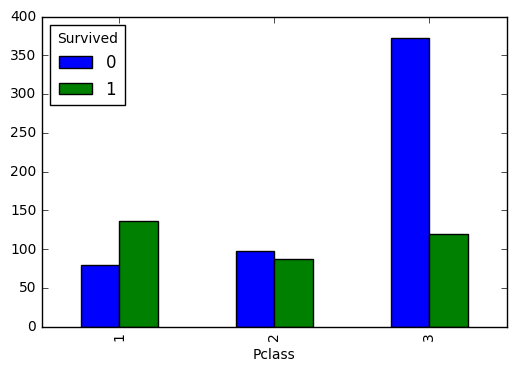

In [4]:
#как класс пассажира влияет на вероятность выживания?
titanic.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind = 'bar')

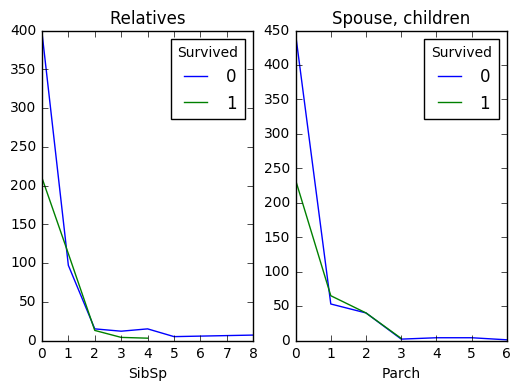

In [5]:
#шансы выжить у одиночки-пары
figure, axes = plt.subplots(ncols=2)
titanic.pivot_table('PassengerId', 'SibSp', 'Survived', 'count').plot(ax=axes[0], title='Relatives')
titanic.pivot_table('PassengerId', 'Parch', 'Survived', 'count').plot(ax=axes[1], title='Spouse, children')

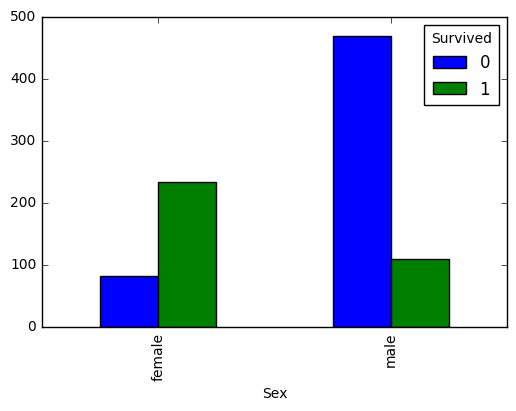

In [6]:
#шансы выжить у мужчины и женщины
titanic.pivot_table('PassengerId', 'Sex', 'Survived', 'count').plot(kind = 'bar')

In [7]:
#проверим заполнение полей Age и Cabine(начинаем нормализацию данных)
titanic.PassengerId[titanic.Cabin.notnull()].count()
titanic.PassengerId[titanic.Age.notnull()].count()

#так как поле Cabine почти не заполнено - убираем его из выборки
#для поля Age дозаполним поле мединаной по возрасту из всей выборки
titanic.Age = titanic.Age.median()

In [8]:
MaxPassEmbarked = titanic.groupby('Embarked').count()['PassengerId']
titanic.Embarked[titanic.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

#избавимся от ненужных полей
titanic = titanic.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1)


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
titanic.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,28.0,1,0,7.2500,S
1,1,1,female,28.0,1,0,71.2833,C
2,1,3,female,28.0,0,0,7.9250,S
3,1,1,female,28.0,1,0,53.1000,S
4,0,3,male,28.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,28.0,0,0,51.8625,S
7,0,3,male,28.0,3,1,21.0750,S
8,1,3,female,28.0,0,2,11.1333,S
9,1,2,female,28.0,1,0,30.0708,C


In [10]:
label = LabelEncoder()
dicts = {}

label.fit(titanic.Sex.drop_duplicates())
dicts['Sex'] = list(label.classes_)
titanic.Sex = label.transform(titanic.Sex)

In [11]:
label.fit(titanic.Embarked.drop_duplicates())
dicts['Embarked'] = list(label.classes_)
titanic.Embarked = label.transform(titanic.Embarked)

In [12]:
test = pd.read_csv('test.csv')
test.Age[test.Age.isnull()] = test.Age.mean()
test.Fare[test.Fare.isnull()] = test.Fare.median() #заполняем пустые значения средней ценой билета
MaxPassEmbarked = test.groupby('Embarked').count()['PassengerId']
test.Embarked[test.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]
result = pd.DataFrame(test.PassengerId)
test = test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

label.fit(dicts['Sex'])
test.Sex = label.transform(test.Sex)

label.fit(dicts['Embarked'])
test.Embarked = label.transform(test.Embarked)

AttributeError: 'DataFrame' object has no attribute 'Age'

In [ ]:
test.head()

In [ ]:
target = titanic.Survived
train = titanic.drop(['Survived'], axis = 1)

kfold = 5
score_val = {}

In [ ]:
ROCtrainTRN, ROCtestTRN, ROCtrainTRG, ROCtestTRG = cross_validation.train_test_split(train, target, test_size = 0.25)

In [ ]:
model_rfc = RandomForestClassifier(n_estimators= 70)
model_lr = LogisticRegression(penalty='l1', tol=0.01)
model_knc = KNeighborsClassifier(n_neighbors = 18)


In [ ]:
score = cross_validation.cross_val_score(model_rfc, train, target, cv = kfold)
score_val['RandomForestClassifier'] = score.mean()

score = cross_validation.cross_val_score(model_lr, train, target, cv = kfold)
score_val['LogisticRegression'] = score.mean()

score = cross_validation.cross_val_score(model_knc, train, target, cv = kfold)
score_val['KNeighborsClassifier'] = score.mean()


pd.DataFrame.from_dict(data = score_val, orient='index').plot(kind='bar', legend=False)

In [ ]:
model_rfc.fit(train, target)
result.insert(1, 'Survived', model_rfc.predict(test))
result.to_csv('test.csv', index = False)